In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ML-LaDECO/MLaDECO

/content/drive/MyDrive/ML-LaDECO/MLaDECO


### Importing libraries and methods from thermograms, ml_training and ultilites modules

In [ ]:
import numpy as np

print('Project MLaDECO')
print('Author: Viswambhar Yasa')
print('Software version: 0.1')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import models
from thermograms.Utilities import Utilities
from ml_training.dataset_generation.fourier_transformation import fourier_transformation
from ml_training.dataset_generation.principal_componant_analysis import principal_componant_analysis
from utilites.segmentation_colormap_anno import segmentation_colormap_anno
from utilites.tolerance_maks_gen import tolerance_predicted_mask
import matplotlib.pyplot as plt

Project MLaDECO
Author: Viswambhar Yasa
Software version: 0.1


##### Importing dataset for training 

In [ ]:
root_path = r'utilites/datasets'
data_file_name = r'metal_data.hdf5'
thermal_class = Utilities()
thermal_data,experiment_list=thermal_class.open_file(root_path, data_file_name,True)
experiment_name=r'2021-12-15-Materialstudie_Metallproben-ML3-laserbehandelte_Probe-1000W-10s'
experimental_data=thermal_data[experiment_name] 

Experiments in the file 

1  :  2021-12-15-Materialstudie_Metallproben-ML1-laserbehandelte_Probe-1000W-10s
2  :  2021-12-15-Materialstudie_Metallproben-ML2-laserbehandelte_Probe-1000W-10s
3  :  2021-12-15-Materialstudie_Metallproben-ML3-laserbehandelte_Probe-1000W-10s


A total of 3 experiments are loaded in file  



##### Checking the shape and file format of the thermographic experiment dataset

In [ ]:
experimental_data

<HDF5 dataset "2021-12-15-Materialstudie_Metallproben-ML3-laserbehandelte_Probe-1000W-10s": shape (256, 256, 1498), type "<f2">

##### Identifying the reflection phase index

In [ ]:
input_data, reflection_st_index, reflection_end_index = fourier_transformation(experimental_data,
                                                                               scaling_type='normalization', index=1)

reflection_start_index:  295   reflection_end_index:  798
The size of filtered data: (256, 256, 503)


In [ ]:
from PIL import Image

##### Performing data normalization to improve the learning ability of machine learning model by scaling down the data between a smaller range

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
exp_data=np.array(experimental_data)
standardizing = StandardScaler()
std_output_data = standardizing.fit_transform(
                exp_data.reshape(exp_data.shape[0], -1)).reshape(exp_data.shape)

In [ ]:
normalizing = MinMaxScaler(feature_range=(0, 1))
nrm_output_data = normalizing.fit_transform(
                exp_data.reshape(exp_data.shape[0], -1)).reshape(exp_data.shape)

##### Plotting thermograms after gaussian normalization and min max scaling operation 

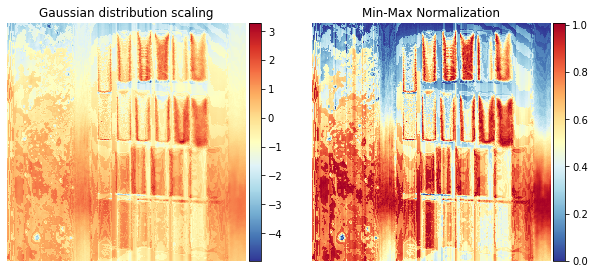

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(std_output_data[:,:,400].astype(np.float32), cmap='RdYlBu_r', interpolation='None')
ax1.set_title('Gaussian distribution scaling')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.axis('off')
ax2 = fig.add_subplot(122)
im2 = ax2.imshow(nrm_output_data[:,:,400].astype(np.float32), cmap='RdYlBu_r', interpolation='None')
ax2.set_title('Min-Max Normalization')
ax2.axis('off')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
plt.savefig(r"Documents/temp/metal_scaling.png",dpi=600,bbox_inches='tight',transparent=True)

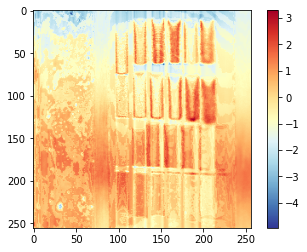

In [ ]:
plt.imshow(std_output_data[:,:,400].astype(np.float32),cmap='RdYlBu_r') 
plt.colorbar()

In [ ]:
#experiment_name='2021-05-11 - Variantenvergleich - VarioTherm Halogenlampe - Winkel 30°'
experimental_data=np.array(thermal_data[experiment_name])

In [ ]:
import tensorflow as tf

In [ ]:
def grayscale_image(data):
  """
  Creates a gray scale image dataset from the input data 

  Args:
      data (numpy array): Thermograms

  Returns:
      (numpy array): Gray scale images
  """
  #print(data.shape)
  seq_data=np.zeros((data.shape))
  for i in range(data.shape[-1]):
    temp=np.expand_dims(data[:,:,i],axis=-1)
    #print(temp.shape)
    a_i=tf.keras.utils.array_to_img(temp).convert('L')
    #a_i=array_to_img(temp).convert('L')
    imgGray = tf.keras.utils.img_to_array(a_i)
    #print(imgGray.shape)
    seq_data[:,:,i]=np.squeeze(imgGray)
  return seq_data
d=grayscale_image(experimental_data)

In [ ]:
d.shape

(256, 256, 1498)

#### Extracting information from gray scale image and saving it in png format

(-0.5, 255.5, 255.5, -0.5)

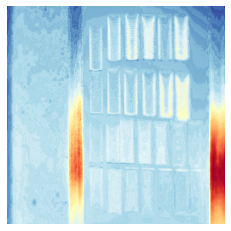

In [ ]:
from PIL import Image
from keras.preprocessing.image import array_to_img,img_to_array
data=experimental_data

plt.figure()
plt.imshow(d[:,:,500],cmap='RdYlBu_r')
#plt.imshow(std_output_data[:,:,250].astype(np.float64),cmap='gray')
plt.savefig("Documents/temp/metal_output.png")
plt.axis('off')

In [ ]:
img=plt.imread('Documents/temp/metal_output.png')

In [ ]:
img.shape

(288, 432, 4)

##### Performing principal companant analysis to features by filtering intensity 

In [ ]:
EOFs=principal_componant_analysis(experimental_data)

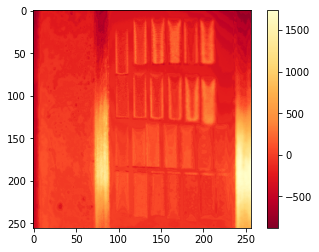

In [ ]:
img1 = Image.fromarray(EOFs[:,:,0].astype(np.int8))
#img2 = Image.fromarray(EOFs[:,:,0].astype(np.float32))
plt.imshow(np.squeeze(EOFs),cmap='YlOrRd_r')
plt.colorbar()
plt.savefig("Documents/temp/metal_PCA.png",dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
mask=np.zeros(shape=(np.squeeze(EOFs).shape))
mask[np.squeeze(EOFs) > 250]=1
mask[np.squeeze(EOFs) < -450]=1
plt.imsave('Documents/temp/metal_mask1.png',np.squeeze(mask),cmap='binary_r')

In [ ]:
substrate=mask

##### Final mask of the dataset

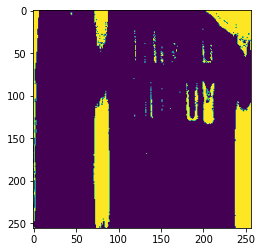

In [ ]:
plt.imshow(mask)

In [ ]:
import cv2
img1 = cv2.imread('Documents/temp/metal_mask1.png',0)
print(img1.shape)

(256, 256)


##### converting the image format data to a numpy array format and scaling it between integer values based on number of features

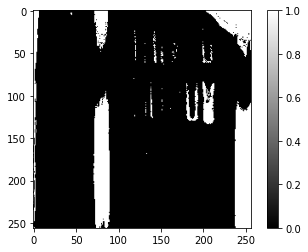

In [ ]:
img1[img1==255]=1
plt.imshow(img1,cmap='binary_r')
plt.colorbar()

##### Saving the segmentation mask

In [ ]:
name='ml_training/dataset_generation/annots/'+experiment_name

In [ ]:
np.save(name,img1)

In [ ]:
ar=np.load(name+'.npy')

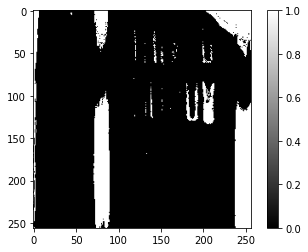

In [ ]:
plt.imshow(ar,cmap='gray')
plt.colorbar()